In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("bmw_pricing_challenge.csv")

In [3]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [5]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [36]:
g1 = df.groupby('paint_color')['price'].count().reset_index()
g1.sort_values('price', ascending=False)

,paint_color,price
1,black,1633
5,grey,1175
2,blue,710
9,white,538
3,brown,341
8,silver,329
7,red,52
0,beige,41
4,green,18
6,orange,6


In [37]:
g2 = df.groupby('paint_color')['price'].sum().reset_index()
g2.sort_values('price', ascending=False)

,paint_color,price
1,black,26411900
5,grey,18325000
2,blue,10731600
9,white,9322700
3,brown,5240400
8,silver,4874500
7,red,858000
0,beige,648500
4,green,129600
6,orange,113200


In [38]:
g3 = df.groupby('paint_color')['price'].mean().reset_index()
g3.sort_values('price', ascending=False)

,paint_color,price
6,orange,18866.666667
9,white,17328.438662
7,red,16500.000000
1,black,16173.851806
0,beige,15817.073171
5,grey,15595.744681
3,brown,15367.741935
2,blue,15114.929577
8,silver,14816.109422
4,green,7200.000000


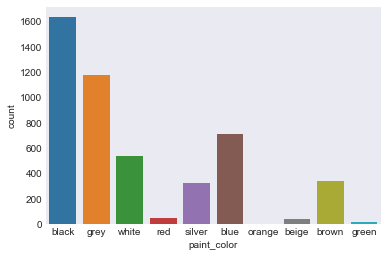

In [7]:
sns.countplot(df.paint_color)

black


<Figure size 432x288 with 0 Axes>

grey


<Figure size 432x288 with 0 Axes>

white


<Figure size 432x288 with 0 Axes>

red


<Figure size 432x288 with 0 Axes>

silver


<Figure size 432x288 with 0 Axes>

blue


<Figure size 432x288 with 0 Axes>

orange


<Figure size 432x288 with 0 Axes>

beige


<Figure size 432x288 with 0 Axes>

brown


<Figure size 432x288 with 0 Axes>

green


<Figure size 432x288 with 0 Axes>

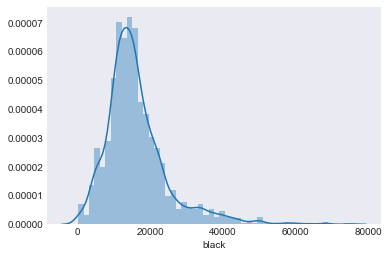

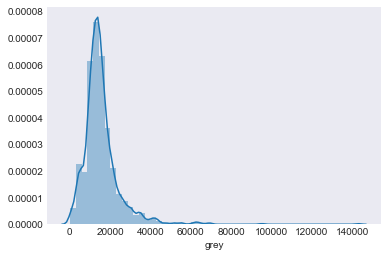

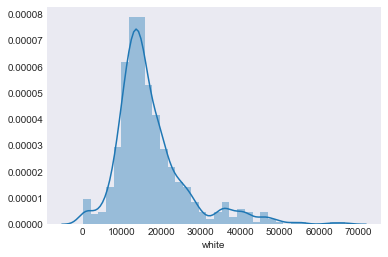

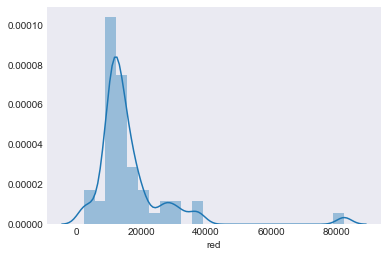

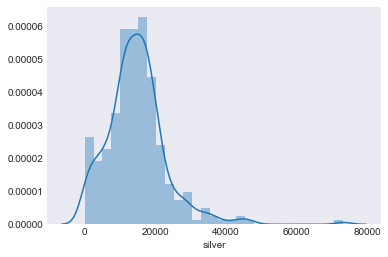

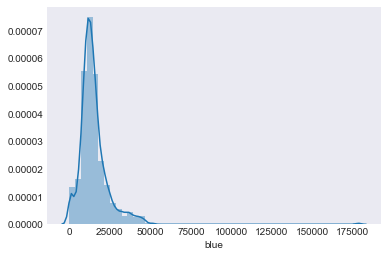

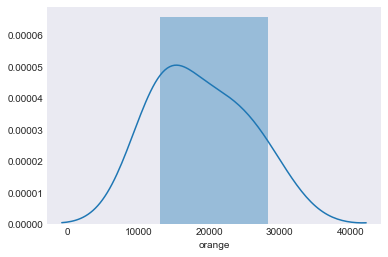

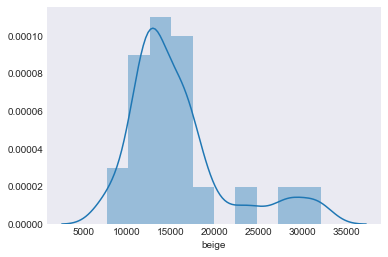

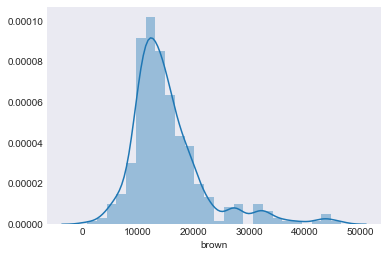

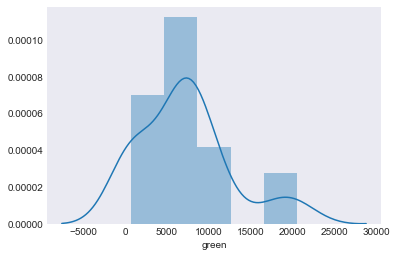

In [25]:
colour = df.paint_color.unique()
for i   in range(len(colour)):
    print(colour[i])
    plt.figure()
    sns.distplot(df['price'][df.paint_color == colour[i]] ,axlabel=colour[i])
    

In [26]:
df[['price','paint_color']]

,price,paint_color
0,11300,black
1,69700,grey
2,10200,white
3,25100,red
4,33400,silver
...,...,...
4838,14600,black
4839,17500,grey
4840,17000,grey
4841,22700,brown
